In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
champ = pd.read_csv('champ.csv',sep=';')
champ.shape

(9338, 15)

In [49]:
champ['time']=pd.to_datetime(champ['Date et heure de comptage'],utc=True)
champ['debit']=champ['Débit horaire']
champ['taux']=champ['Taux d\'occupation']
champ=champ[['time','debit','taux']]
champ = champ.sort_values(by='time')
champ.set_index('time', inplace=True)

In [50]:
champ.head()

,debit,taux
time,,
2022-11-01 03:00:00+00:00,672.0,8.89223
2022-11-01 04:00:00+00:00,513.0,7.12889
2022-11-01 05:00:00+00:00,494.0,6.22500
2022-11-01 06:00:00+00:00,513.0,5.80723
2022-11-01 07:00:00+00:00,484.0,5.57111


### Hypothèses:
1) les deux variables sont dépendantes de l'heure dans la journée
2) sont dépendantes de la période de l'année
3) sont dépendantes de la journée
4) sont corrélées 

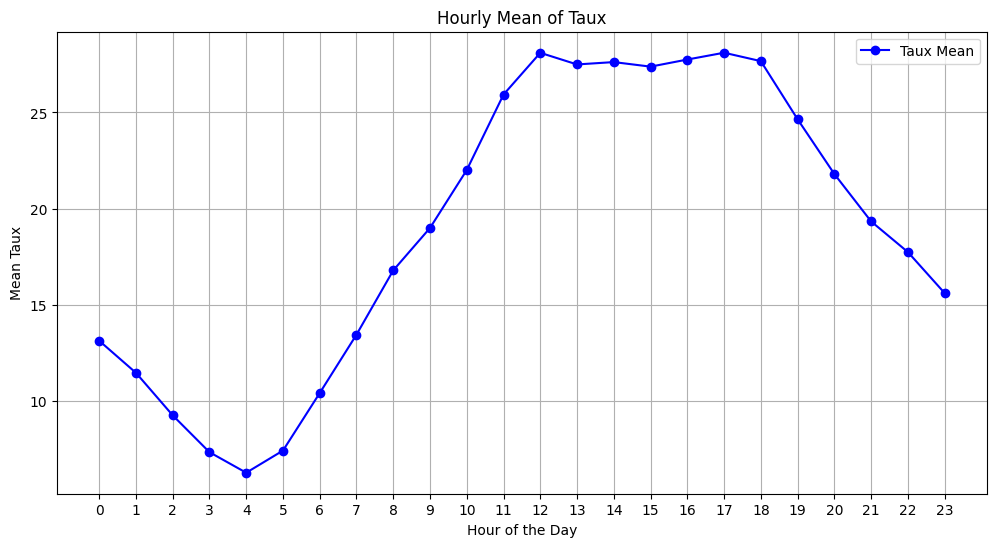

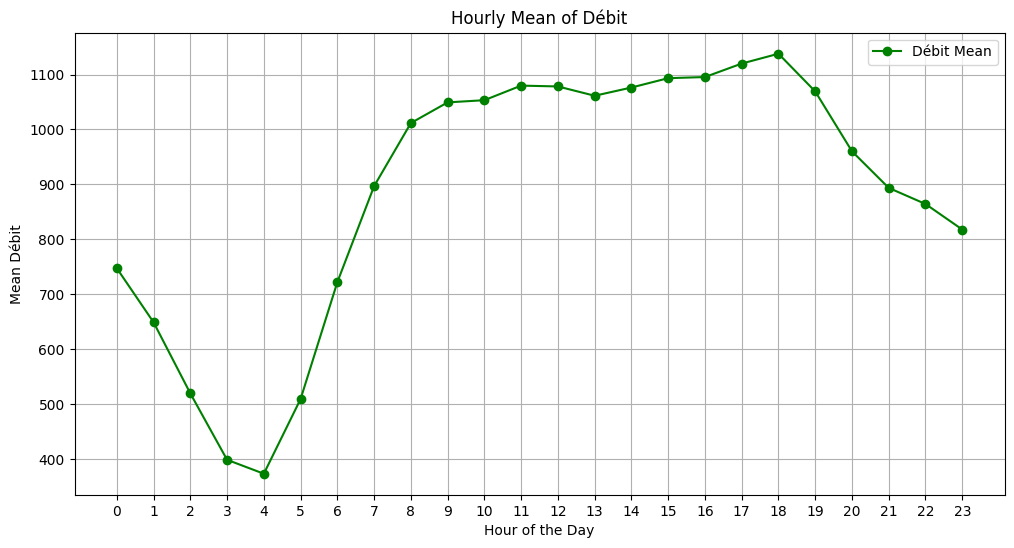

In [15]:

#plotting the mean of debit and taux in each hour accross the data

hourly_mean = champ.groupby(champ.index.hour).mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_mean['taux'], label='Taux Mean', marker='o', color='blue')
plt.title('Hourly Mean of Taux')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Taux')
plt.xticks(range(0, 24), range(0, 24))  # Hour labels
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(hourly_mean['debit'], label='Débit Mean', marker='o', color='green')
plt.title('Hourly Mean of Débit')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Débit')
plt.xticks(range(0, 24), range(0, 24))  # Hour labels
plt.grid(True)
plt.legend()
plt.show()


Ces deux plots confirment 1 et 4

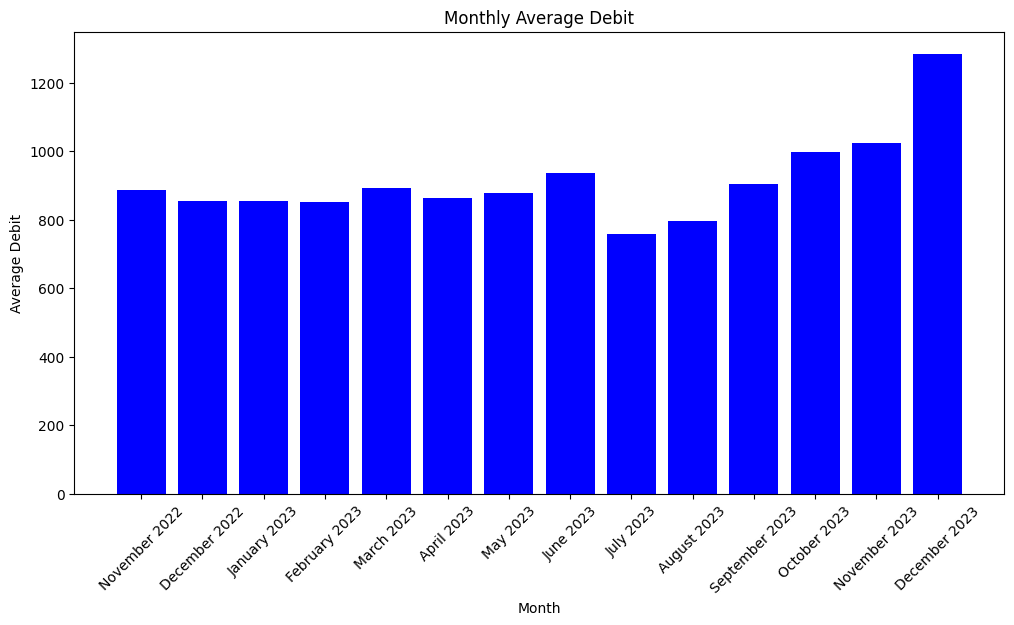

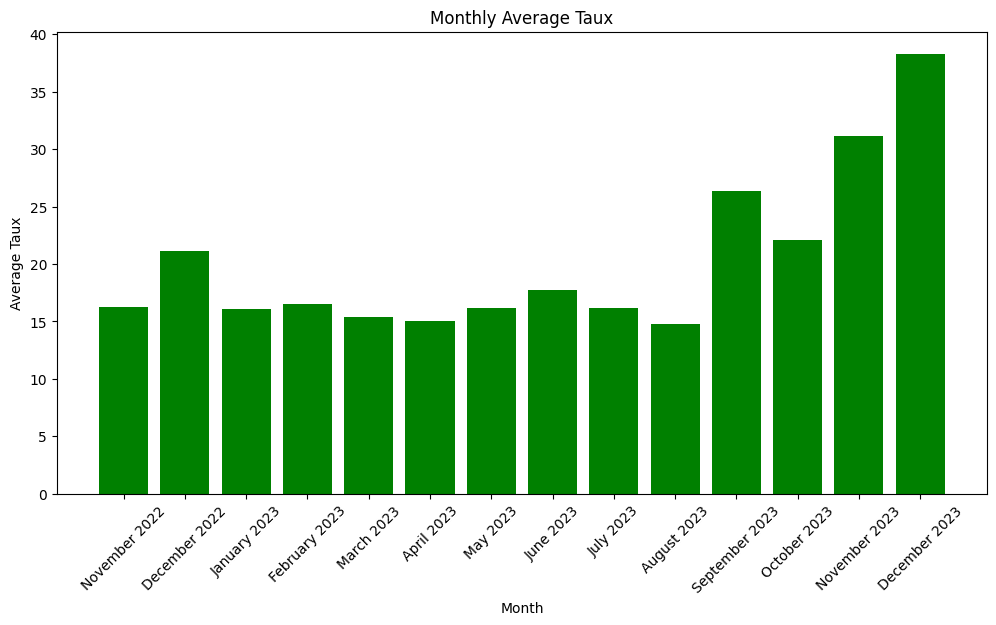

In [53]:
monthly_means = champ.resample('M').mean()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract month names for x-axis labels
monthly_means['Month'] = monthly_means.index.strftime('%B %Y')

# Plotting bar chart for 'debit'
plt.figure(figsize=(12, 6))
plt.bar(monthly_means['Month'], monthly_means['debit'], color='blue')
plt.title('Monthly Average Debit')
plt.xlabel('Month')
plt.ylabel('Average Debit')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Plotting bar chart for 'taux'
plt.figure(figsize=(12, 6))
plt.bar(monthly_means['Month'], monthly_means['taux'], color='green')
plt.title('Monthly Average Taux')
plt.xlabel('Month')
plt.ylabel('Average Taux')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()




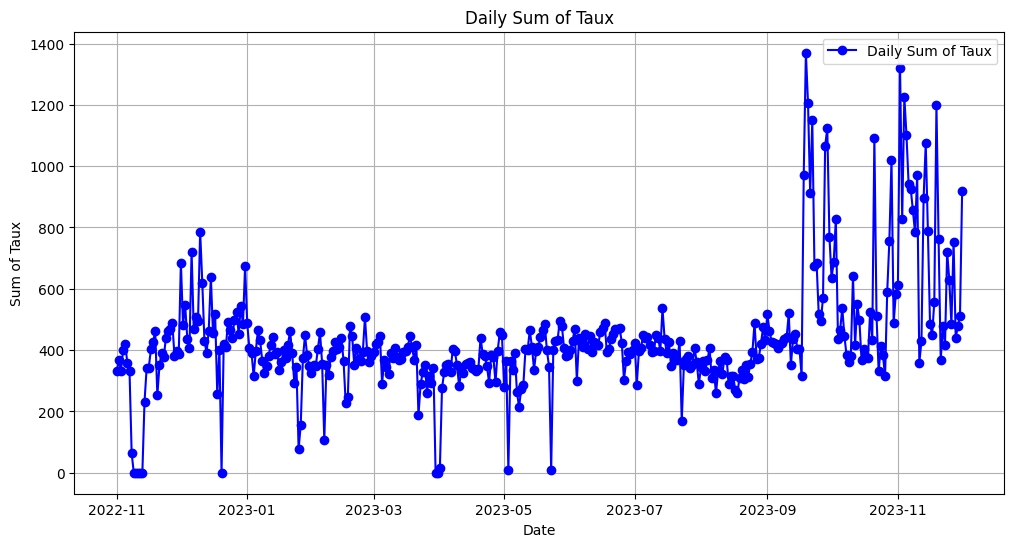

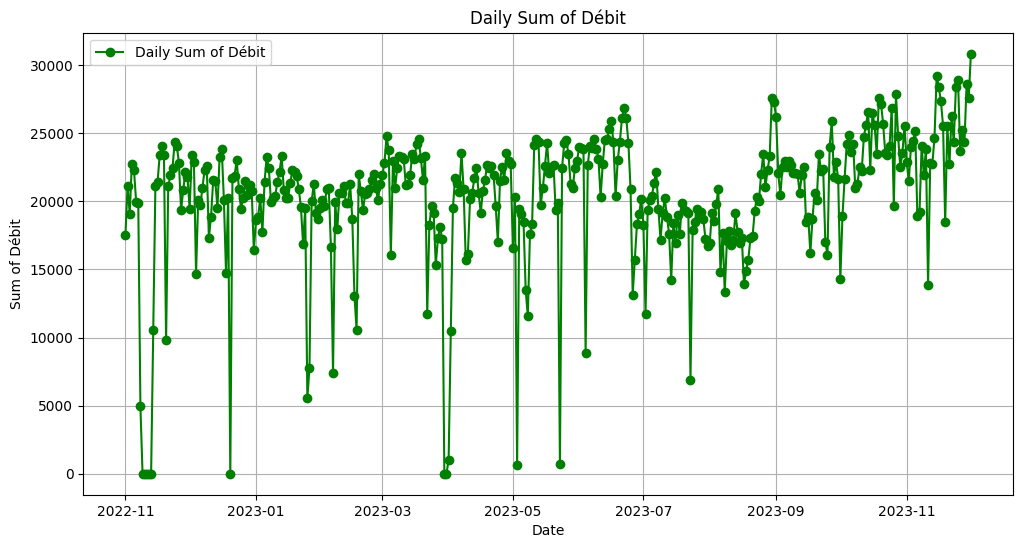

In [16]:
#evolution of daily mean of taux and debit throughout the data

daily_sum = champ.resample('D').sum()
import matplotlib.pyplot as plt

# Plot for 'taux'
plt.figure(figsize=(12, 6))
plt.plot(daily_sum['taux'], label='Daily Sum of Taux', color='blue', marker='o')
plt.title('Daily Sum of Taux')
plt.xlabel('Date')
plt.ylabel('Sum of Taux')
plt.grid(True)
plt.legend()
plt.show()

# Plot for 'débit'
plt.figure(figsize=(12, 6))
plt.plot(daily_sum['debit'], label='Daily Sum of Débit', color='green', marker='o')
plt.title('Daily Sum of Débit')
plt.xlabel('Date')
plt.ylabel('Sum of Débit')
plt.grid(True)
plt.legend()
plt.show()


seems like some days are having a sum of zero accross all day, let's see if that's due to missing values or some particular event

In [17]:
# Assuming daily_sum is already calculated
zero_sum_days = daily_sum[(daily_sum['taux'] == 0) | (daily_sum['debit'] == 0)]
zero_sum_dates = zero_sum_days.index
# Convert to a more readable format if needed
formatted_dates = zero_sum_dates.strftime('%Y-%m-%d').tolist()
print(formatted_dates)


['2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-12-20', '2023-03-30', '2023-03-31']


In [19]:
champ.index = pd.to_datetime(champ.index).date
# Get dates where sum is zero
zero_sum_dates = zero_sum_days.index.date

# Filter and print data for these dates
for date in zero_sum_dates:
    day_data = champ[champ.index == date]
    print(f"Data for {date}:")
    print(day_data)



Data for 2022-11-09:
            debit  taux
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
2022-11-09    NaN   NaN
Data for 2022-11-10:
            debit  taux
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   NaN
2022-11-10    NaN   Na

effectivement c'est des valeurs manquantes, on va remplacer les valeurs nulles par la première valeur non nulle de la meme heure du meme jour dans les semaines precedantes

In [24]:

def find_closest_non_null(df, current_index, column_name):
    day_of_week = current_index.dayofweek
    hour = current_index.hour
    for i in range(1, len(df)):
        # Look back i weeks
        past_index = current_index - pd.DateOffset(weeks=i)
        # Check if this past_index exists in the DataFrame
        if past_index in df.index:
            past_value = df.loc[past_index, column_name]
            if pd.notnull(past_value):
                return past_value
    return None
for index, row in champ.iterrows():
    for col in ['taux', 'debit']:  # Replace with your column names
        if pd.isnull(row[col]):
            champ.at[index, col] = find_closest_non_null(champ, index, col)


 average of debit and taux for each day of the week throughout the data

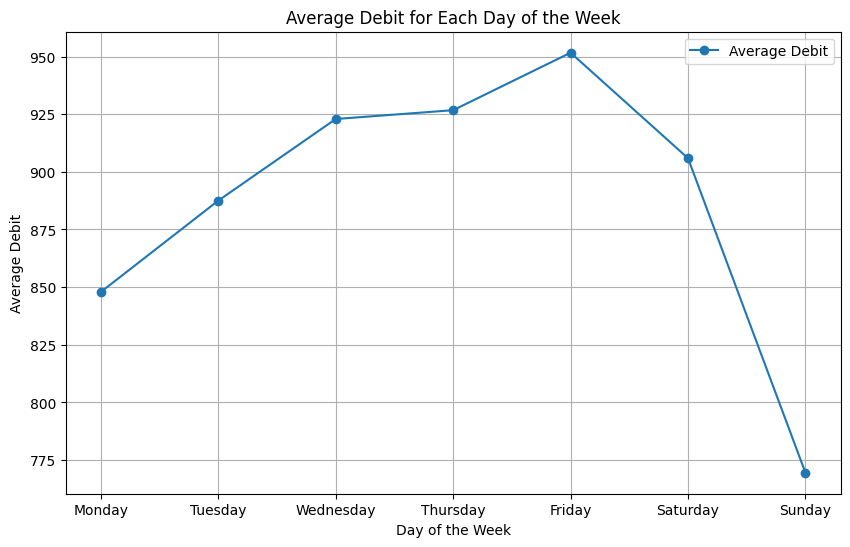

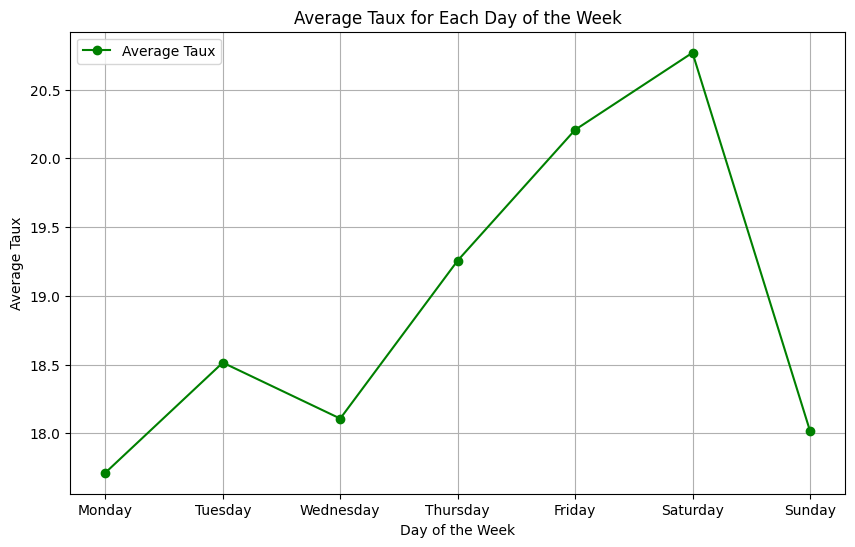

In [25]:

day_of_week_mean = champ.groupby(champ.index.dayofweek).mean()
# Mapping the day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_mean.index = days
import matplotlib.pyplot as plt

# Plot for 'debit'
plt.figure(figsize=(10, 6))
plt.plot(day_of_week_mean['debit'], label='Average Debit', marker='o')
plt.title('Average Debit for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Debit')
plt.xticks(days)  # Set x-ticks as days
plt.grid(True)
plt.legend()
plt.show()

# Plot for 'taux'
plt.figure(figsize=(10, 6))
plt.plot(day_of_week_mean['taux'], label='Average Taux', marker='o', color='green')
plt.title('Average Taux for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Taux')
plt.xticks(days)  # Set x-ticks as days
plt.grid(True)
plt.legend()
plt.show()


monday having the lowest average is weird, might be an error in the code

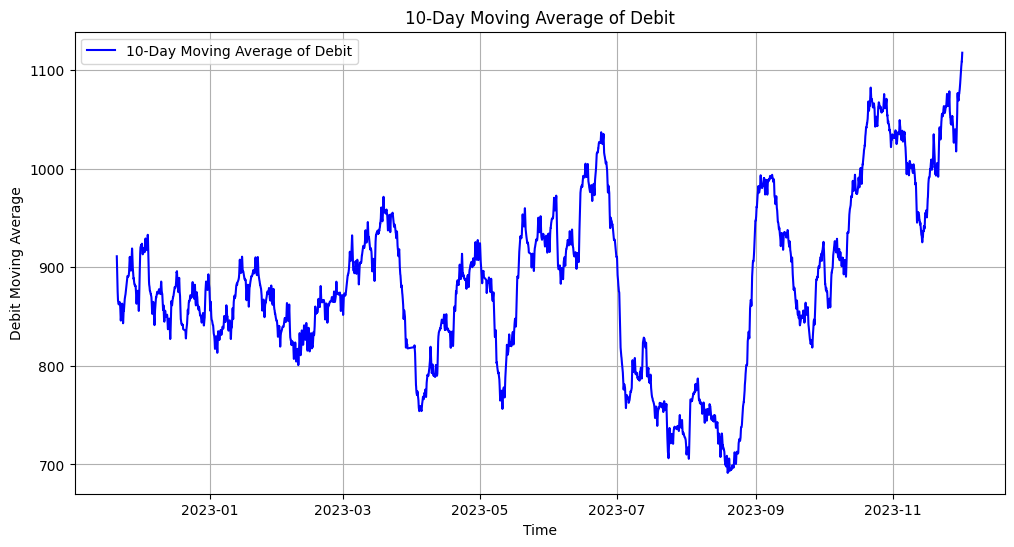

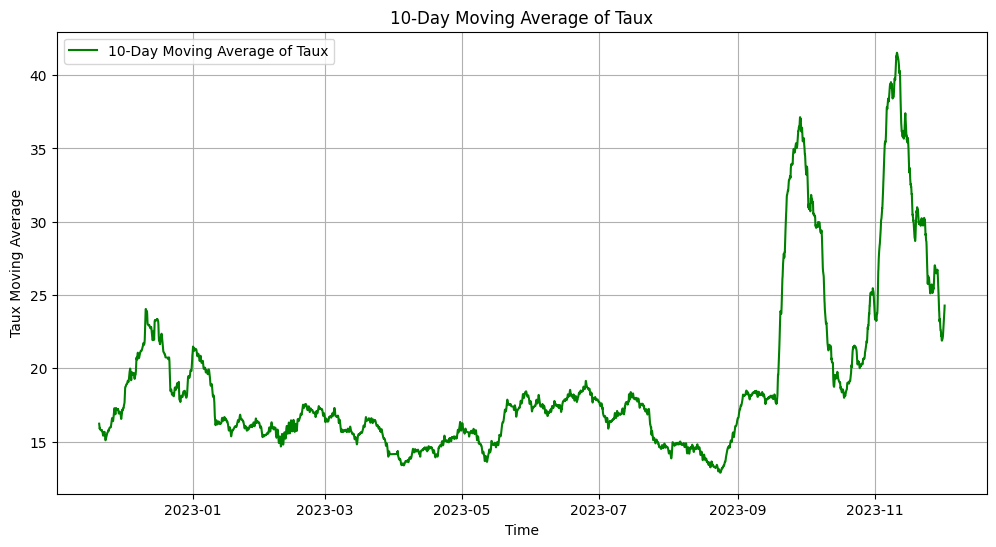

In [30]:
# Calculate 10-day (240-hour) moving averages
champ['debit_moving_avg'] = champ['debit'].rolling(window=240).mean()
champ['taux_moving_avg'] = champ['taux'].rolling(window=240).mean()


# Plot for 'debit' moving average
plt.figure(figsize=(12, 6))
plt.plot(champ['debit_moving_avg'], label='10-Day Moving Average of Debit', color='blue')
plt.title('10-Day Moving Average of Debit')
plt.xlabel('Time')
plt.ylabel('Debit Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Plot for 'taux' moving average
plt.figure(figsize=(12, 6))
plt.plot(champ['taux_moving_avg'], label='10-Day Moving Average of Taux', color='green')
plt.title('10-Day Moving Average of Taux')
plt.xlabel('Time')
plt.ylabel('Taux Moving Average')
plt.legend()
plt.grid(True)
plt.show()



# testing Prophet model

In [45]:
from prophet import Prophet

# Reset index to get date/time in a column
df_prophet = champ.reset_index().rename(columns={'time': 'ds', 'taux': 'y'})

df_prophet = df_prophet.dropna(subset=['ds', 'y'])
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Get the date 10 days before the last date in the dataset
cutoff_date = df_prophet['ds'].max() - pd.Timedelta(days=10)


# Split the data
train = df_prophet[df_prophet['ds'] <= cutoff_date]
test = df_prophet[df_prophet['ds'] > cutoff_date]
# Initialize the Prophet model
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=10, freq='D')
forecast = model.predict(future)
# Extract the predicted values for the test set dates
predicted = forecast[forecast['ds'].isin(test['ds'])]
# Merge the predictions with the test set
test = test.set_index('ds')
predicted = predicted.set_index('ds')
comparison_df = test.join(predicted[['yhat']], how='inner')
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(comparison_df['y'], comparison_df['yhat'])
print(f'Mean Squared Error for taux: {mse}')

23:24:21 - cmdstanpy - INFO - Chain [1] start processing
23:24:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error for taux: 240.12519894135102


 now for debit

In [46]:

df_prophet = champ.reset_index().rename(columns={'time': 'ds', 'debit': 'y'})

df_prophet = df_prophet.dropna(subset=['ds', 'y'])
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Get the date 10 days before the last date in the dataset
cutoff_date = df_prophet['ds'].max() - pd.Timedelta(days=10)


# Split the data
train = df_prophet[df_prophet['ds'] <= cutoff_date]
test = df_prophet[df_prophet['ds'] > cutoff_date]
# Initialize the Prophet model
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=10, freq='D')
forecast = model.predict(future)
# Extract the predicted values for the test set dates
predicted = forecast[forecast['ds'].isin(test['ds'])]
# Merge the predictions with the test set
test = test.set_index('ds')
predicted = predicted.set_index('ds')
comparison_df = test.join(predicted[['yhat']], how='inner')
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(comparison_df['y'], comparison_df['yhat'])
print(f'Mean Squared Error for debit: {mse}')

23:24:54 - cmdstanpy - INFO - Chain [1] start processing
23:24:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error for debit: 45104.78388983295


better than the previous benchmark